In [1]:
%matplotlib notebook
from sklearn import datasets, linear_model, tree, svm 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('work_file.csv', sep=";")
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [4]:
X = df.to_numpy()
Y = X[:,10]
X = X[:,0:9]
X = X[:,np.newaxis, 8]
x_train = X[:-30]
x_test = X[-30:]
y_train = Y[:-30]
y_test = Y[-30:]

<IPython.core.display.Javascript object>


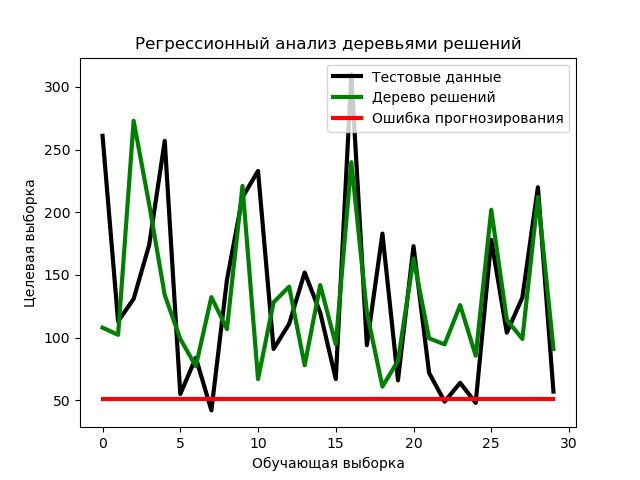

In [7]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
tree_predictions = tree_reg.predict(x_test)

tree_errors = []
for i in range(len(y_test)):
    tree_error = mean_absolute_error([y_test], [tree_predictions])
    tree_errors.append(tree_error)


plt.title('Регрессионный анализ деревьями решений')
plt.xlabel("Обучающая выборка")
plt.ylabel("Целевая выборка")
plt.plot(y_test,  color='black', linewidth=3, label="Тестовые данные")
plt.plot(tree_predictions, color='green', linewidth=3, label="Дерево решений")
plt.plot(tree_errors, color='red', linewidth=3, label="Ошибка прогнозирования")
plt.legend()
plt.show()

In [6]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, tree_predictions))
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, tree_predictions))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, tree_predictions))

Mean absolute error: 51.07
Mean squared error: 4668.40
Coefficient of determination: 0.09


<IPython.core.display.Javascript object>


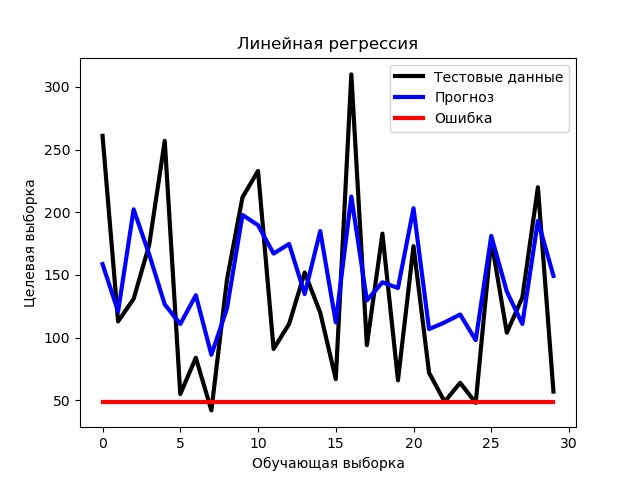

In [7]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

errors = []
for i in range(len(y_test)):
    error = mean_absolute_error([y_test], [y_pred])
    errors.append(error)
    
plt.title('Линейная регрессия')
plt.xlabel("Обучающая выборка")
plt.ylabel("Целевая выборка")
plt.plot(y_test,  color='black', linewidth=3, label="Тестовые данные")
plt.plot(y_pred, color='blue', linewidth=3, label ="Прогноз")
plt.plot(errors, color='red', linewidth=3, label = "Ошибка")
plt.legend()
plt.show()

In [8]:
print('Coefficients: \n', regr.coef_)
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [82.05882463]
Mean absolute error: 49.06
Mean squared error: 3312.22
Coefficient of determination: 0.36


<IPython.core.display.Javascript object>


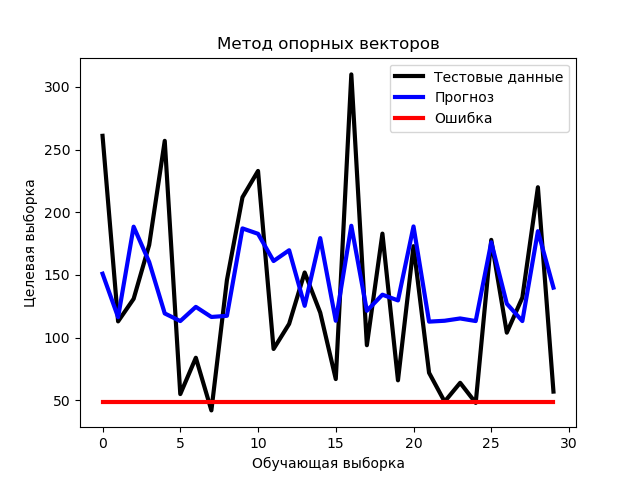

In [9]:
regr_svm = svm.SVR()
regr_svm.fit(x_train, y_train)
svm_pred = regr_svm.predict(x_test)

errors_svm = []
for i in range(len(y_test)):
    error_svm = mean_absolute_error([y_test], [svm_pred])
    errors_svm.append(error_svm)
    
plt.title('Метод опорных векторов')
plt.xlabel("Обучающая выборка")
plt.ylabel("Целевая выборка")
plt.plot(y_test,  color='black', linewidth=3, label="Тестовые данные")
plt.plot(svm_pred, color='blue', linewidth=3, label ="Прогноз")
plt.plot(errors, color='red', linewidth=3, label = "Ошибка")
plt.legend()
plt.show()

In [10]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, svm_pred))
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, svm_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, svm_pred))

Mean absolute error: 50.68
Mean squared error: 3586.46
Coefficient of determination: 0.30


<IPython.core.display.Javascript object>


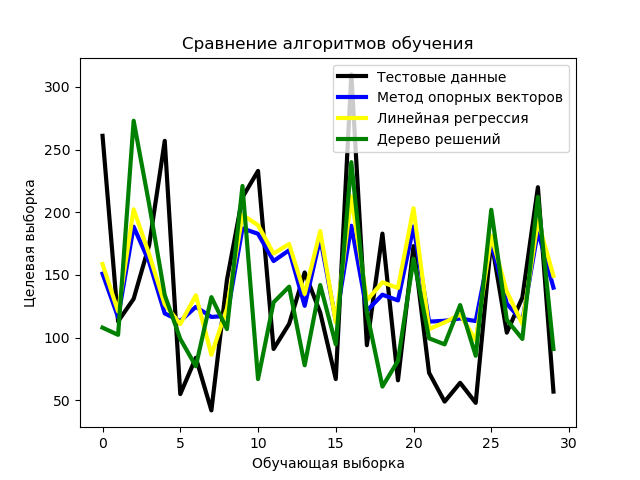

In [11]:
plt.title('Сравнение алгоритмов обучения')
plt.xlabel("Обучающая выборка")
plt.ylabel("Целевая выборка")
plt.plot(y_test,  color='black', linewidth=3, label="Тестовые данные")
plt.plot(svm_pred, color='blue', linewidth=3, label ="Метод опорных векторов")
plt.plot(y_pred, color='yellow', linewidth=3, label ="Линейная регрессия")
plt.plot(tree_predictions, color='green', linewidth=3, label="Дерево решений")
plt.legend()
plt.show()

In [8]:
tree_errors

[51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445,
 51.06944444444445]